<a href="https://colab.research.google.com/github/naufalfrdss/DeepLearning/blob/main/UAS/Chapter%209/Unsupervised_Learning_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import dan Generate Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Generate data blob sintetis dengan 4 pusat cluster
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)


K-Means Clustering

In [2]:
# KMeans clustering dengan 4 cluster
kmeans = KMeans(n_clusters=4, random_state=42)
y_pred = kmeans.fit_predict(X)  # prediksi cluster tiap titik


Visualisasi Hasil K-Means

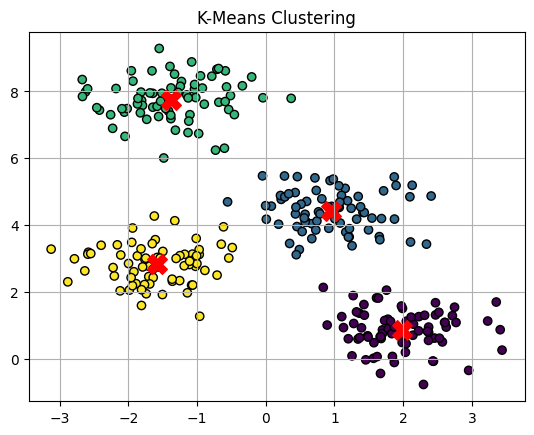

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="viridis", edgecolor="k")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X')  # Centroid KMeans
plt.title("K-Means Clustering")
plt.grid()
plt.show()


Elbow Method untuk Menentukan k Optimal

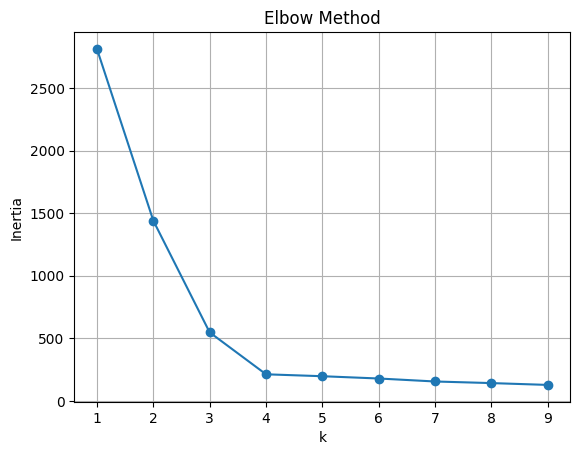

In [4]:
inertias = []
for k in range(1, 10):
    km = KMeans(n_clusters=k)
    km.fit(X)
    inertias.append(km.inertia_)  # total within-cluster sum of squares

plt.plot(range(1, 10), inertias, marker="o")
plt.title("Elbow Method")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.grid()
plt.show()


Evaluasi K-Means dengan Silhouette Score

In [5]:
print("Silhouette score:", silhouette_score(X, y_pred))


Silhouette score: 0.6819938690643478


DBSCAN Clustering

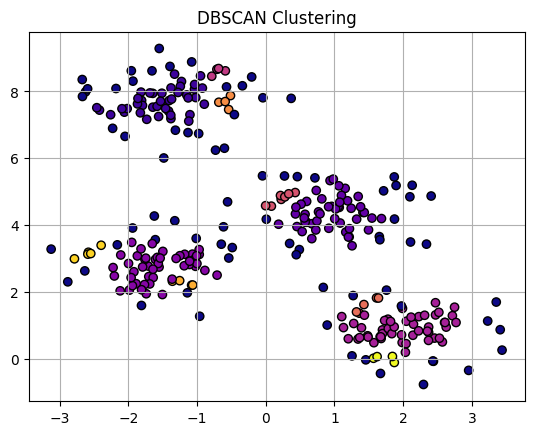

In [6]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
y_dbscan = dbscan.fit_predict(X)  # -1 artinya noise

plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, cmap="plasma", edgecolor="k")
plt.title("DBSCAN Clustering")
plt.grid()
plt.show()


Gaussian Mixture Model (GMM)

In [7]:
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
gmm.fit(X)
y_gmm = gmm.predict(X)  # klasifikasi berdasarkan distribusi probabilistik


Visualisasi Hasil GMM

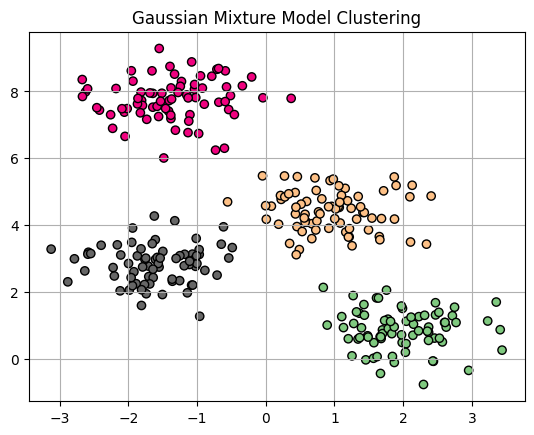

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y_gmm, cmap="Accent", edgecolor="k")
plt.title("Gaussian Mixture Model Clustering")
plt.grid()
plt.show()


Probabilitas Prediksi GMM

In [9]:
# Menampilkan probabilitas keanggotaan cluster untuk 5 titik pertama
probs = gmm.predict_proba(X[:5])
print("Prediction probabilities:\n", probs)


Prediction probabilities:
 [[9.71688955e-01 2.59296402e-02 8.04672295e-21 2.38140471e-03]
 [7.13116691e-33 7.15846263e-09 9.99999993e-01 2.34837535e-15]
 [8.78022033e-12 9.99999970e-01 2.04767765e-08 9.13480329e-09]
 [7.76731322e-35 1.51487210e-09 9.99999998e-01 3.38693314e-18]
 [9.99174464e-01 8.20264795e-04 1.38368754e-24 5.27089805e-06]]
